# Case Study: Investigating Distributions in NDT7 and Cloudflare AIM Data

This code investigates and compares the distributions of data from two sources:

1. **NDT7 dataset**: Contains network performance measurements, such as latency and throughput.
2. **Cloudflare AIM dataset**: Provides performance data from Cloudflare’s network, including server response times and packet loss.

### Objective:
The primary goal is to explore the distribution of the **merged dataset** and check how the individual distributions compare with the merged one.

### Steps:
1. **Distribution Comparison**: We will visualize the distributions of key features from both datasets and the merged dataset.
2. **Merging**: Finally, we will merge the datasets and compare the overall distribution.

The analysis will help determine whether combining the datasets affects their individual distributions or if they align in meaningful ways.


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [173]:
ndt7_download = pd.read_csv("data/ndt7_download_case_study.csv")
ndt7_upload = pd.read_csv("data/ndt7_upload_case_study.csv")
cf_data = pd.read_csv("data/cloudflare_case_study.csv")

countries = ["All countries", "GT", "PL", "GH", "BR", "FJ"]
common_fields = ["city", "country_iso", "test_time", "asn"]
download_study_fields = ["packet_loss_rate", "download_throughput_mbps", "download_latency_ms", "download_jitter"]
upload_study_fields = ["packet_loss_rate", "upload_throughput_mbps", "upload_latency_ms", "upload_jitter"]

download_fields_info = {
    "packet_loss_rate": {
        "title": "Packet Loss Rate",
        "measure_unit": "%"
    },
    "download_throughput_mbps": {
        "title": "Download Throughput",
        "measure_unit": "Mbps"
    },
    "download_latency_ms": {
        "title": "Download Latency",
        "measure_unit": "ms"
    },
    "download_jitter": {
        "title": "Download Jitter",
    }
}

upload_fields_info = {
    "packet_loss_rate": {
        "title": "Packet Loss Rate",
        "measure_unit": "%"
    },
    "upload_throughput_mbps": {
        "title": "Upload Throughput",
        "measure_unit": "Mbps"
    },
    "upload_latency_ms": {
        "title": "Upload Latency",
        "measure_unit": "ms"
    },
    "upload_jitter": {
        "title": "Upload Jitter",
    }
}

In [174]:
def plot_distribution_download(country_iso: str):
    legend_added = False
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))

    for i, attribute_name in enumerate(download_study_fields):
        title = f'{download_fields_info[attribute_name]["title"]} ({country_iso})'
        measure_unit = download_fields_info[attribute_name].get("measure_unit")
        x_label = f'{attribute_name} ({measure_unit})' if measure_unit else f'{attribute_name}'

        ndt7_download_measurement = ndt7_download[ndt7_download['country_iso'] == country_iso][[attribute_name]].copy().dropna()
        cf_download_measurement = cf_data[cf_data['country_iso'] == country_iso][[attribute_name]].copy().dropna()
        if country_iso == "All countries":
            ndt7_download_measurement = ndt7_download[[attribute_name]].copy().dropna()
            cf_download_measurement = cf_data[[attribute_name]].copy().dropna()
        merged_data = pd.concat([ndt7_download_measurement, cf_download_measurement], ignore_index=True)


        counts_ndt7, bin_edges_ndt7 = np.histogram(
            ndt7_download_measurement[attribute_name].dropna(),
            bins=100, density=True
        )

        ndt_bin_width = bin_edges_ndt7[1] - bin_edges_ndt7[0]
        cf_num_bins = max(int((np.max(cf_download_measurement[attribute_name]) - np.min(cf_download_measurement[attribute_name])) / ndt_bin_width), 1)
        counts_cf, bin_edges_cf = np.histogram(
            cf_download_measurement[attribute_name].dropna(),
            bins=cf_num_bins, density=True
        )
        merged_num_bins = max(int((np.max(merged_data[attribute_name]) - np.min(merged_data[attribute_name])) / ndt_bin_width), 1)
        counts_merged, bin_edges_merged = np.histogram(merged_data[attribute_name], bins=merged_num_bins, density=True)

        upper_limit = np.percentile(merged_data[attribute_name].dropna(), 95)
        lower_limit = 0

        ax = axes[i]
        if not legend_added:
            ax.plot(bin_edges_ndt7[:-1], counts_ndt7, label='NDT7', alpha=0.5, color='darkblue')
            ax.plot(bin_edges_cf[:-1], counts_cf, label='Cloudflare', alpha=0.5, color='green')
            ax.plot(bin_edges_merged[:-1], counts_merged, label='Merged', alpha=0.5, color='saddlebrown', linestyle='--')
            legend_added = True
        else:
            ax.plot(bin_edges_ndt7[:-1], counts_ndt7, alpha=0.5, color='darkblue')
            ax.plot(bin_edges_cf[:-1], counts_cf, alpha=0.5, color='green')
            ax.plot(bin_edges_merged[:-1], counts_merged, alpha=0.5, color='saddlebrown', linestyle='--')
        ax.set_title(f'{title} PDFs')
        ax.set_xlabel(x_label)
        ax.set_ylabel('Density')
        ax.set_xlim(lower_limit, upper_limit)
        ax.grid(True, linestyle='--', alpha=0.2)

    fig.suptitle(f'Measurement Distributions ({country_iso})', fontsize=16)
    plt.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=3)
    plt.show()

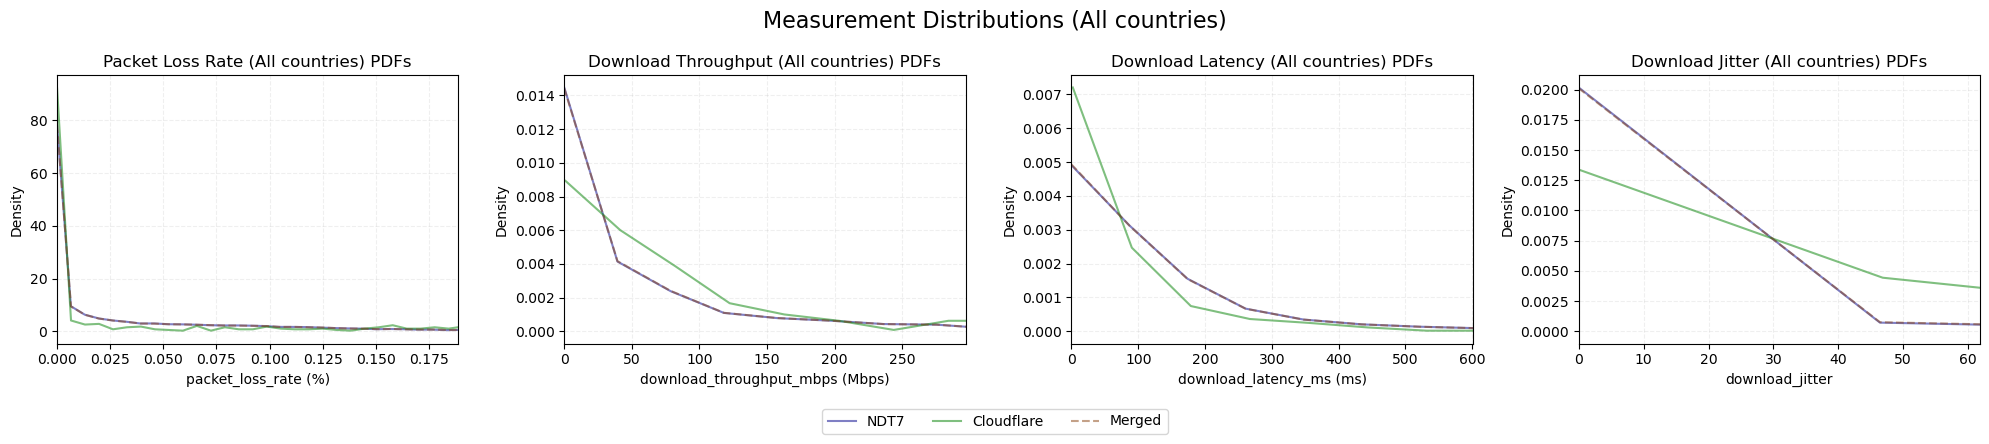

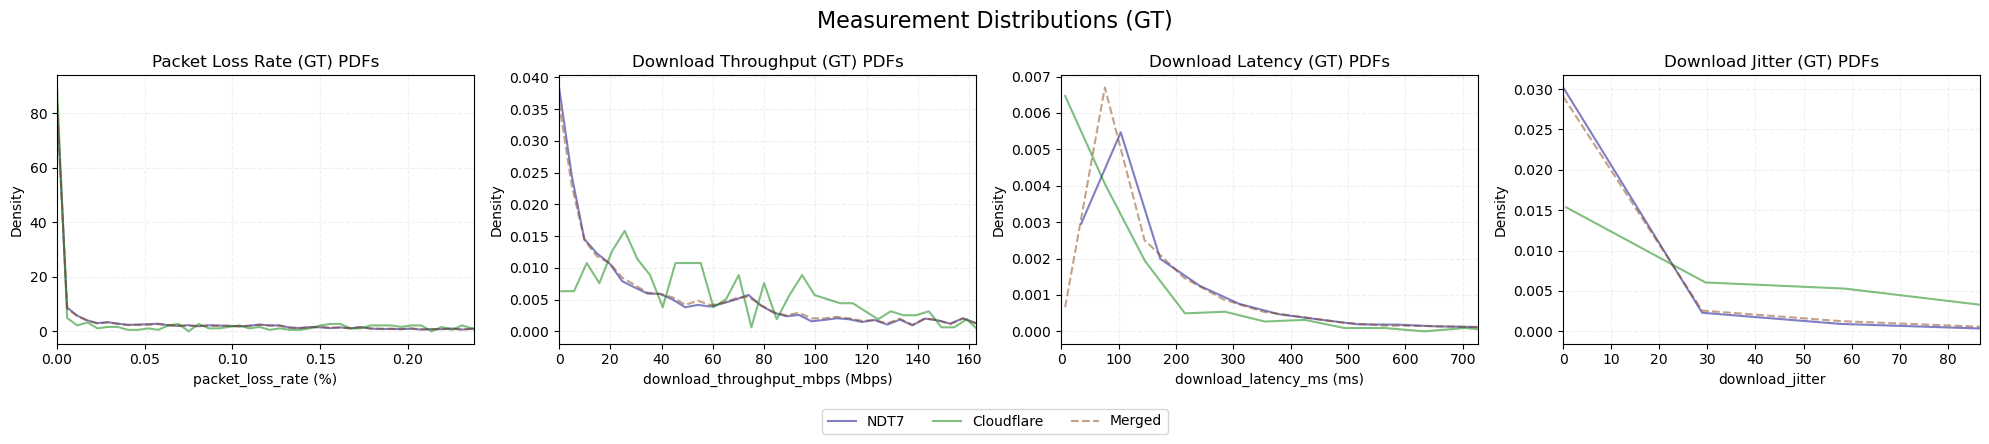

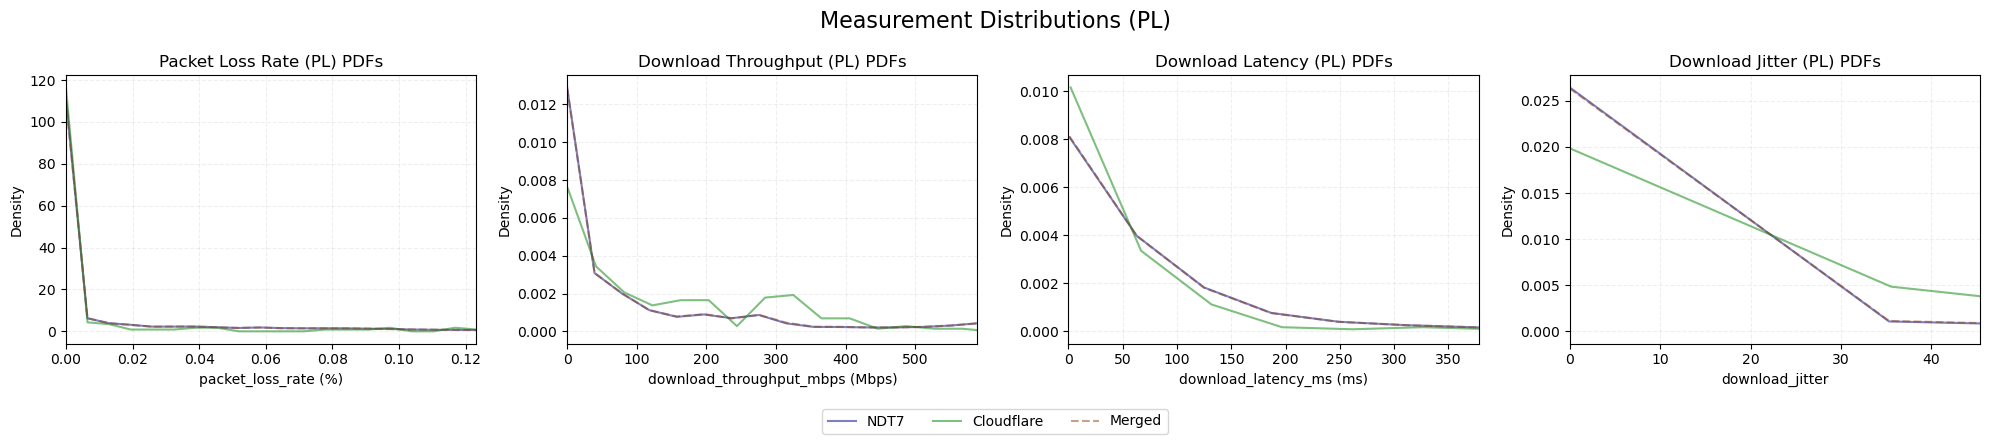

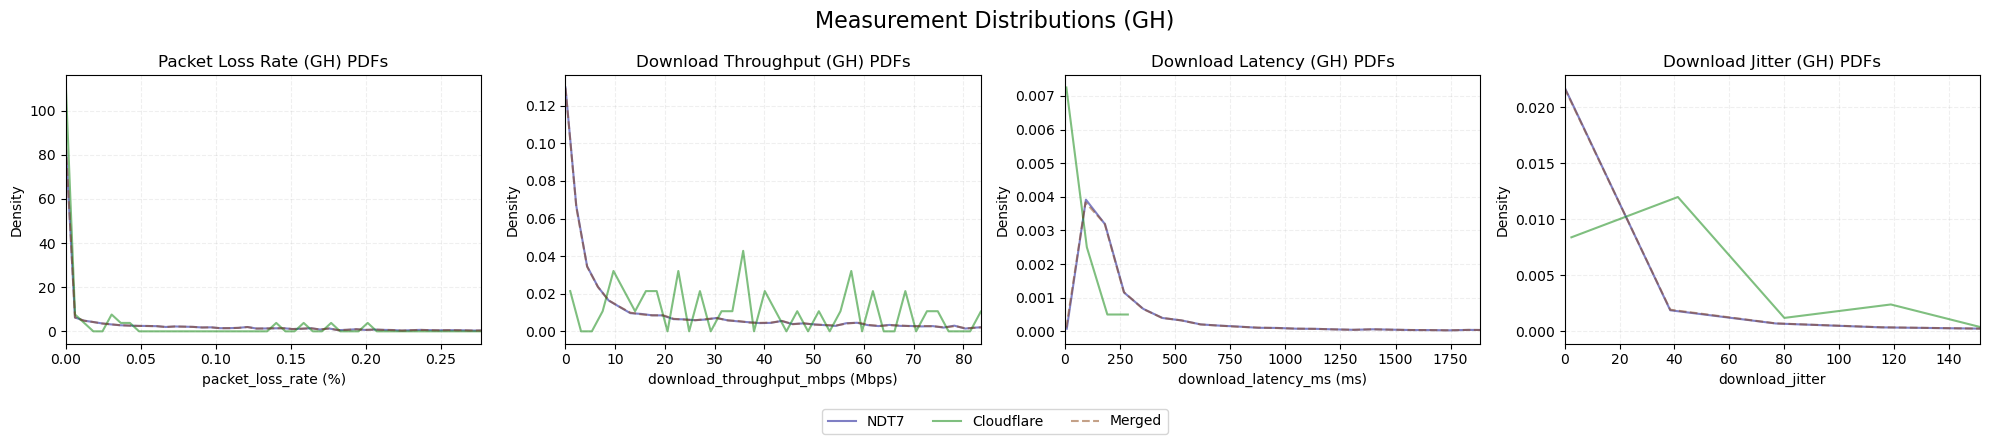

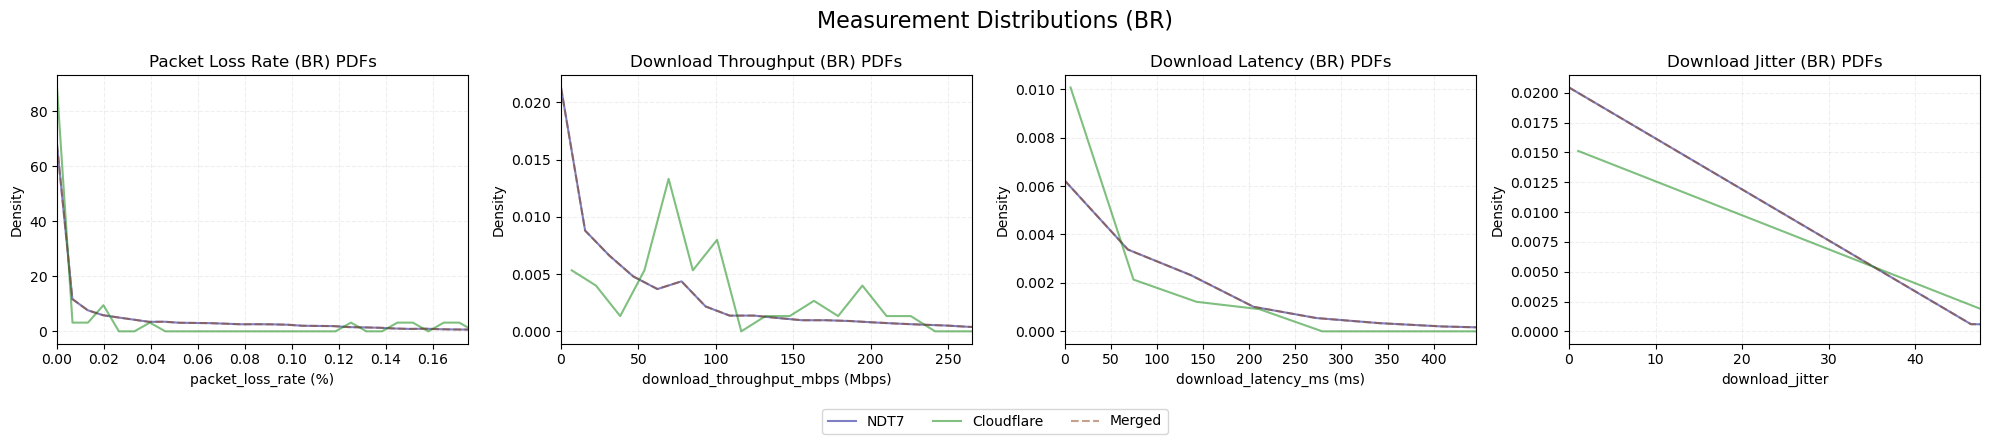

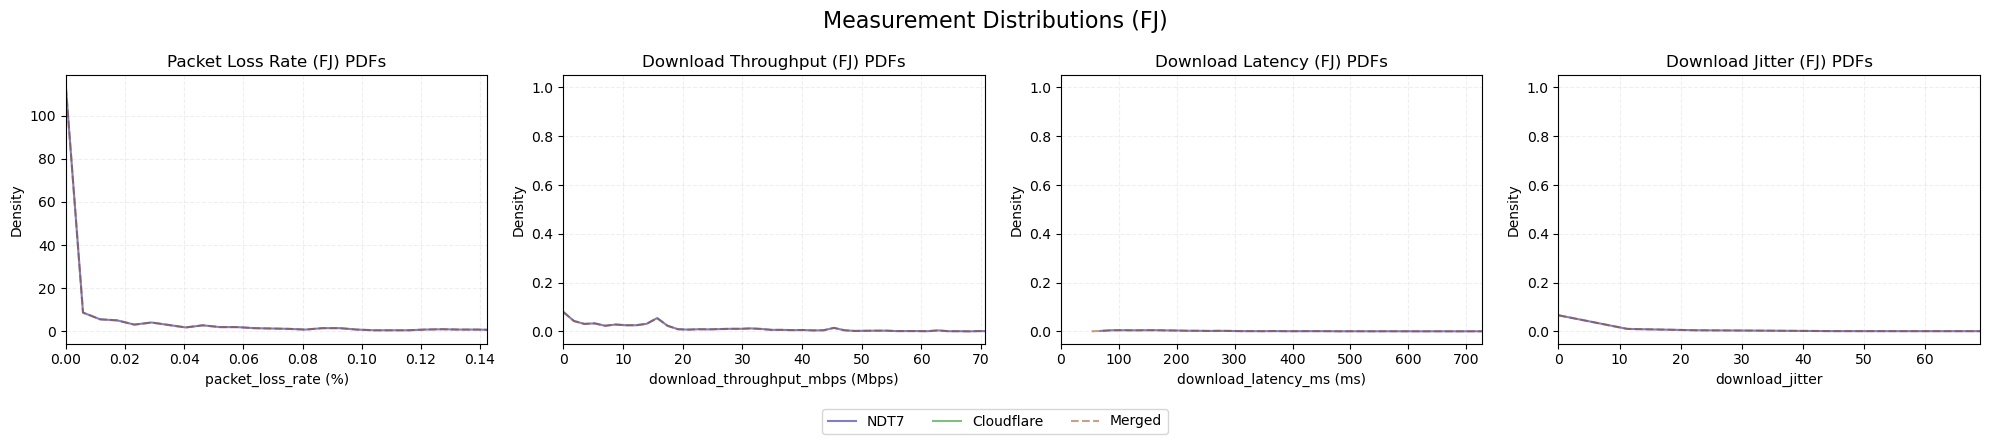

In [175]:
for country_iso in countries:
    plot_distribution_download(country_iso)

In [176]:
def plot_distribution_upload(country_iso: str):
    legend_added = False
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))

    for i, attribute_name in enumerate(upload_study_fields):
        title = f'{upload_fields_info[attribute_name]["title"]} ({country_iso})'
        measure_unit = upload_fields_info[attribute_name].get("measure_unit")
        x_label = f'{attribute_name} ({measure_unit})' if measure_unit else f'{attribute_name}'

        ndt7_upload_measurement = ndt7_upload[ndt7_upload['country_iso'] == country_iso][[attribute_name]].copy().dropna()
        cf_upload_measurement = cf_data[cf_data['country_iso'] == country_iso][[attribute_name]].copy().dropna()
        if country_iso == "All countries":
            ndt7_upload_measurement = ndt7_upload[[attribute_name]].copy().dropna()
            cf_upload_measurement = cf_data[[attribute_name]].copy().dropna()
        merged_data = pd.concat([ndt7_upload_measurement, cf_upload_measurement], ignore_index=True)


        counts_ndt7, bin_edges_ndt7 = np.histogram(
            ndt7_upload_measurement[attribute_name].dropna(),
            bins=100, density=True
        )

        ndt_bin_width = bin_edges_ndt7[1] - bin_edges_ndt7[0]
        cf_num_bins = max(int((np.max(cf_upload_measurement[attribute_name]) - np.min(cf_upload_measurement[attribute_name])) / ndt_bin_width), 1)
        counts_cf, bin_edges_cf = np.histogram(
            cf_upload_measurement[attribute_name].dropna(),
            bins=cf_num_bins, density=True
        )
        merged_num_bins = max(int((np.max(merged_data[attribute_name]) - np.min(merged_data[attribute_name])) / ndt_bin_width), 1)
        counts_merged, bin_edges_merged = np.histogram(merged_data[attribute_name], bins=merged_num_bins, density=True)

        upper_limit = np.percentile(merged_data[attribute_name].dropna(), 95)
        lower_limit = 0
        if upper_limit == 0:
            upper_limit = np.max(merged_data[attribute_name])

        ax = axes[i]
        if not legend_added:
            ax.plot(bin_edges_ndt7[:-1], counts_ndt7, label='NDT7', alpha=0.5, color='darkblue')
            ax.plot(bin_edges_cf[:-1], counts_cf, label='Cloudflare', alpha=0.5, color='green')
            ax.plot(bin_edges_merged[:-1], counts_merged, label='Merged', alpha=0.5, color='saddlebrown', linestyle='--')
            legend_added = True
        else:
            ax.plot(bin_edges_ndt7[:-1], counts_ndt7, alpha=0.5, color='darkblue')
            ax.plot(bin_edges_cf[:-1], counts_cf, alpha=0.5, color='green')
            ax.plot(bin_edges_merged[:-1], counts_merged, alpha=0.5, color='saddlebrown', linestyle='--')
        ax.set_title(f'{title} PDFs')
        ax.set_xlabel(x_label)
        ax.set_ylabel('Density')
        ax.set_xlim(lower_limit, upper_limit)
        ax.grid(True, linestyle='--', alpha=0.2)

    fig.suptitle(f'Measurement Distributions ({country_iso})', fontsize=16)
    plt.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=3)
    plt.show()

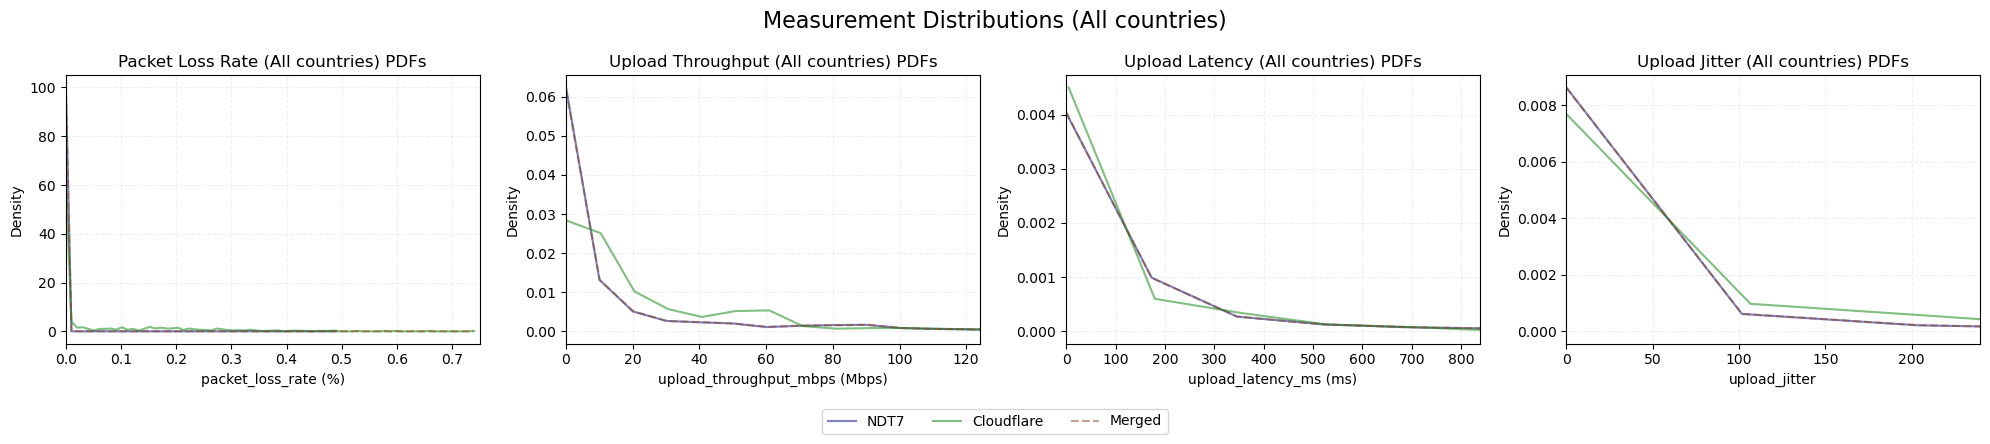

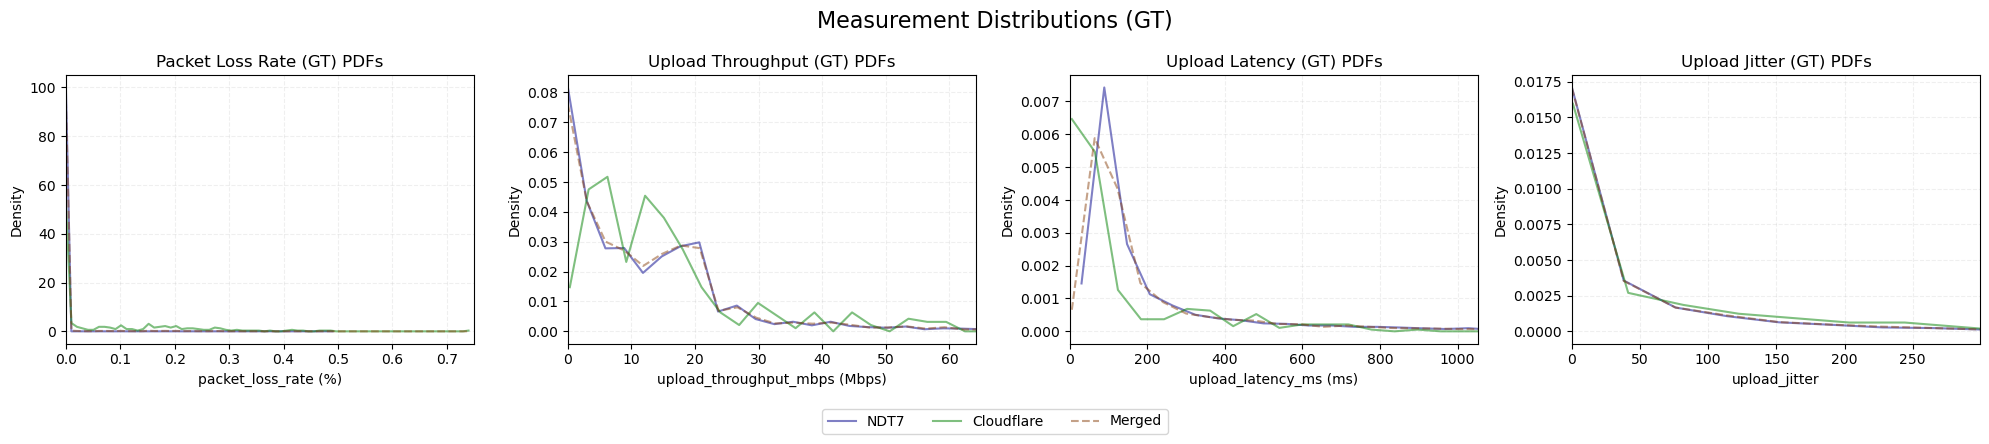

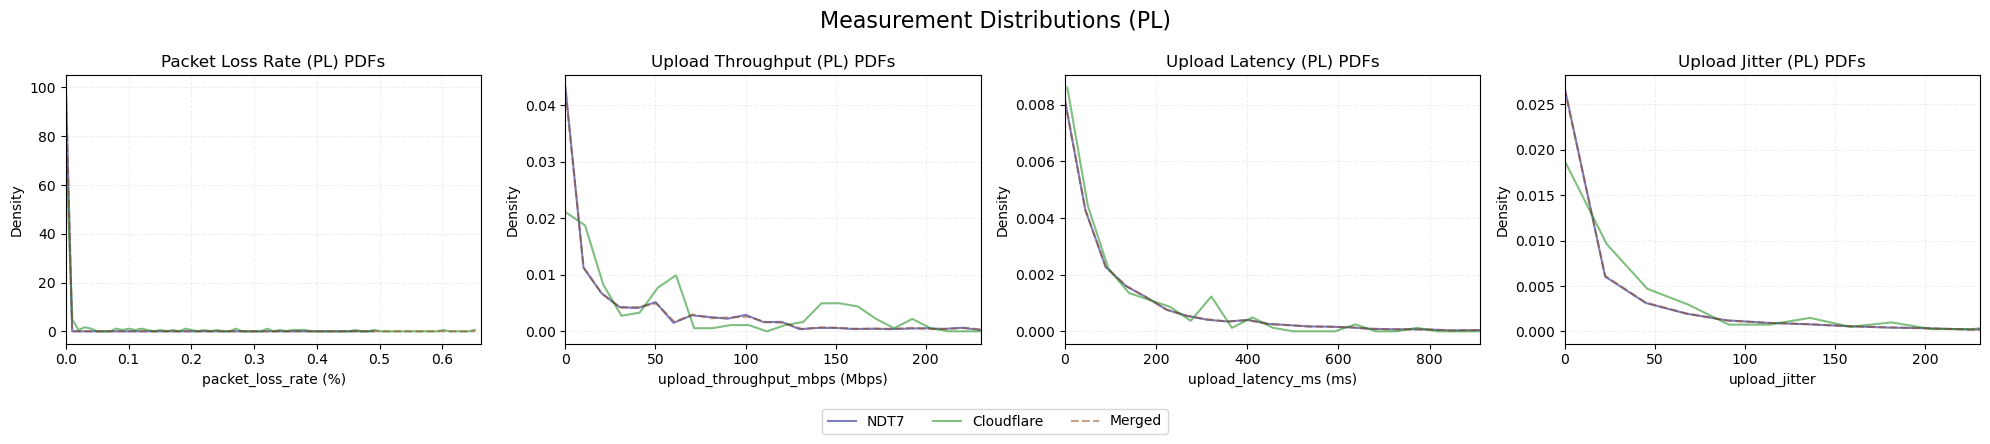

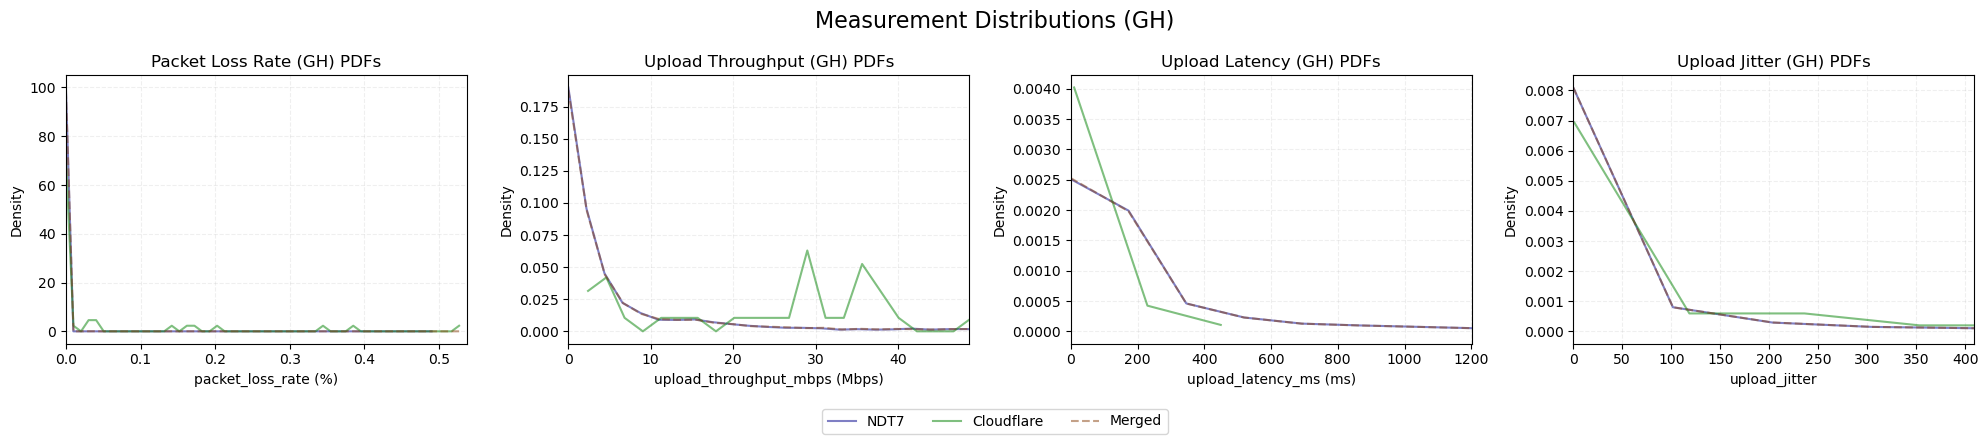

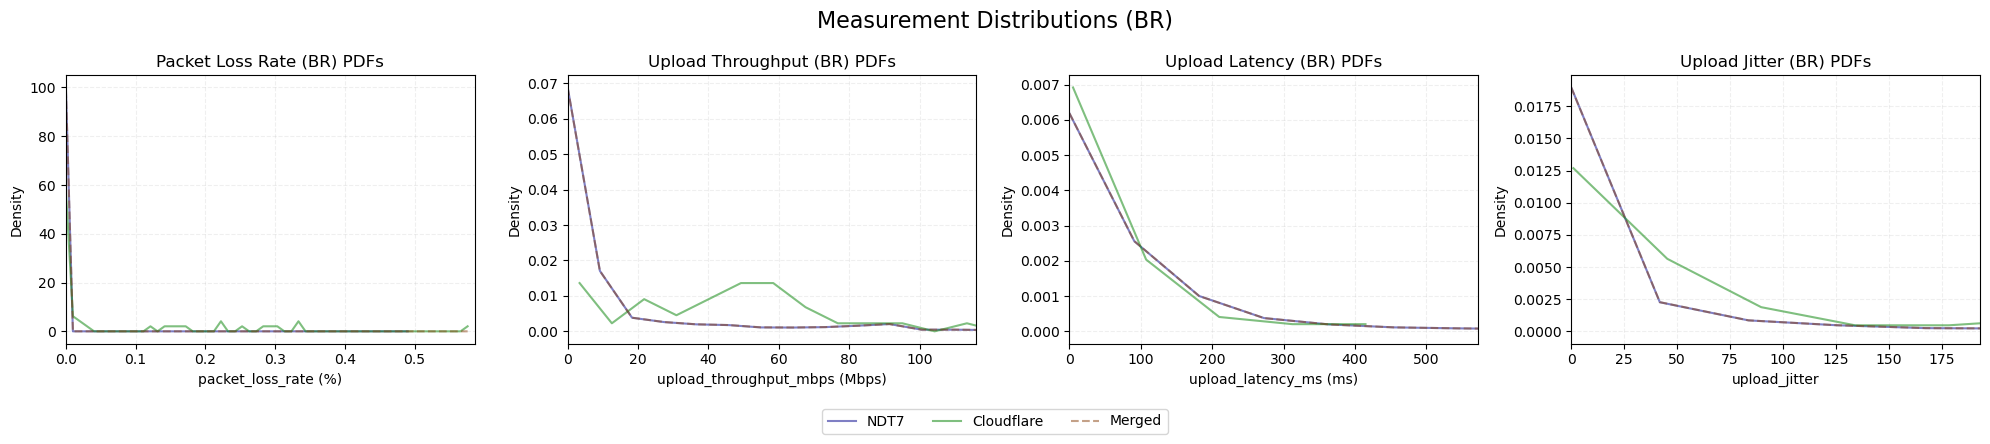

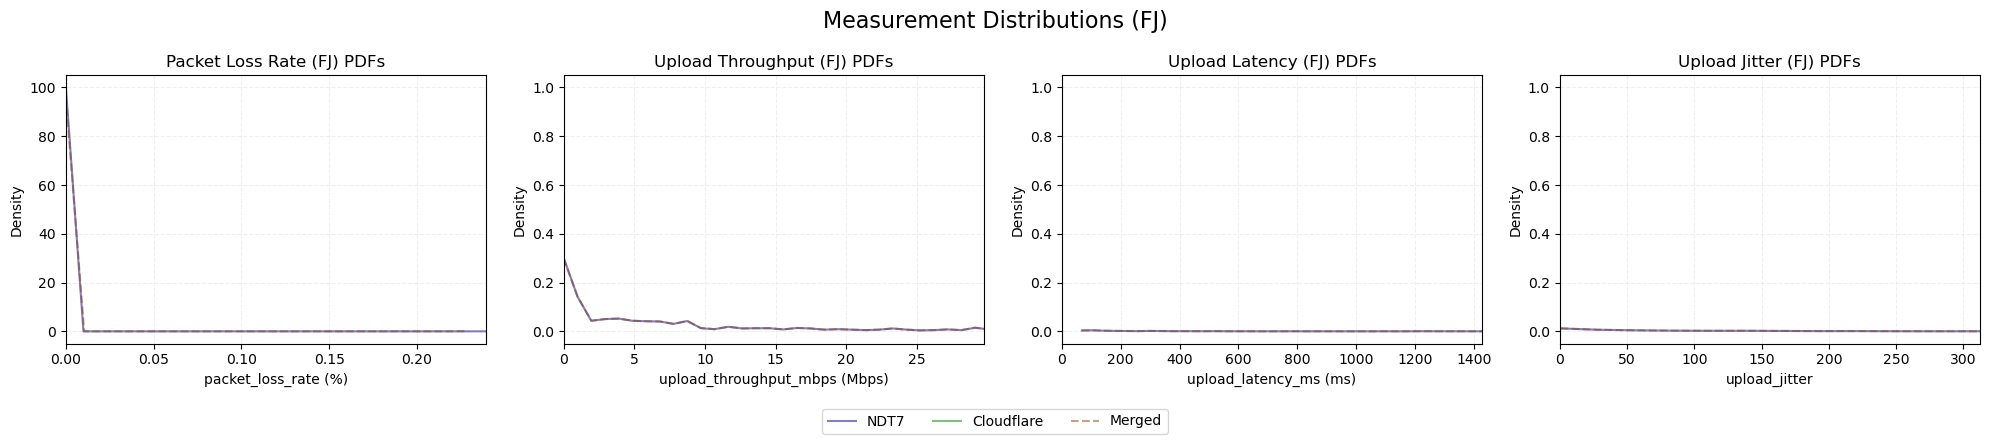

In [177]:
for country_iso in countries:
    plot_distribution_upload(country_iso)